# IMPORT DATASET

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('E:\\trimester 4\\fraud analytics\\New Credit card data.csv')
print(data)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

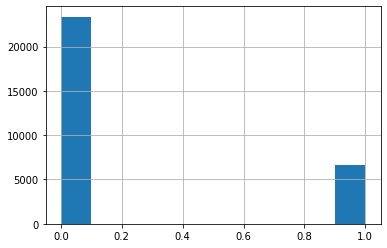

In [3]:
data['default payment next month'].hist()

In [4]:
#we are checking any missing values.
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
data.duplicated().sum()

35

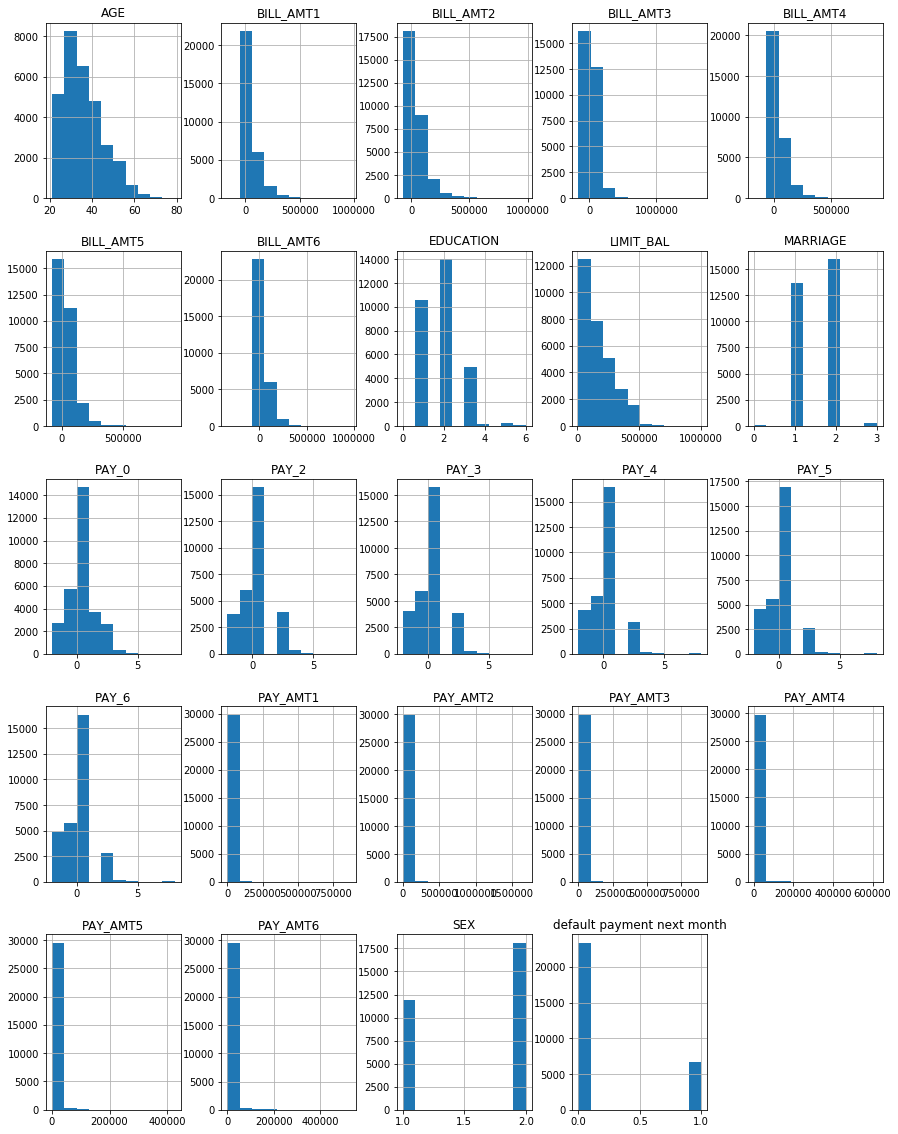

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

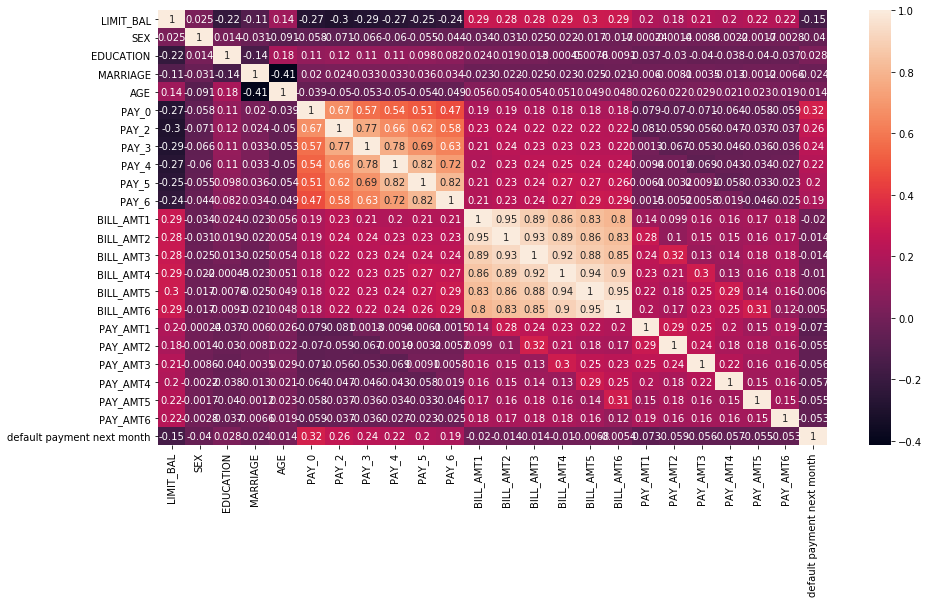

In [7]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
print(data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('No default', round(data['default payment next month'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('default', round(data['default payment next month'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No default 77.88 % of the dataset
default 22.12 % of the dataset


# **CONVERTING INTO Z SCORE**

In [10]:

from scipy import stats
z = np.abs(stats.zscore(data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]))
print(z)


[[1.13672015 0.81016074 0.18582826 ... 0.30806256 0.31413612 0.29338206]
 [0.3659805  0.81016074 0.18582826 ... 0.24422965 0.31413612 0.18087821]
 [0.59720239 0.81016074 0.18582826 ... 0.24422965 0.24868274 0.01212243]
 ...
 [1.05964618 1.23432296 0.18582826 ... 0.03996431 0.18322937 0.11900109]
 [0.67427636 1.23432296 1.45111372 ... 0.18512036 3.15253642 0.19190359]
 [0.90549825 1.23432296 0.18582826 ... 0.24422965 0.24868274 0.23713013]]


In [11]:
threshold = 3
print(np.where(z > 3))

(array([    6,     6,     6, ..., 29997, 29998, 29998], dtype=int64), array([11, 12, 13, ...,  5, 17, 21], dtype=int64))


In [12]:
data.shape


(30000, 24)

In [13]:
df = data[(z < 3).all(axis=1)]
df.shape

(26429, 24)

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

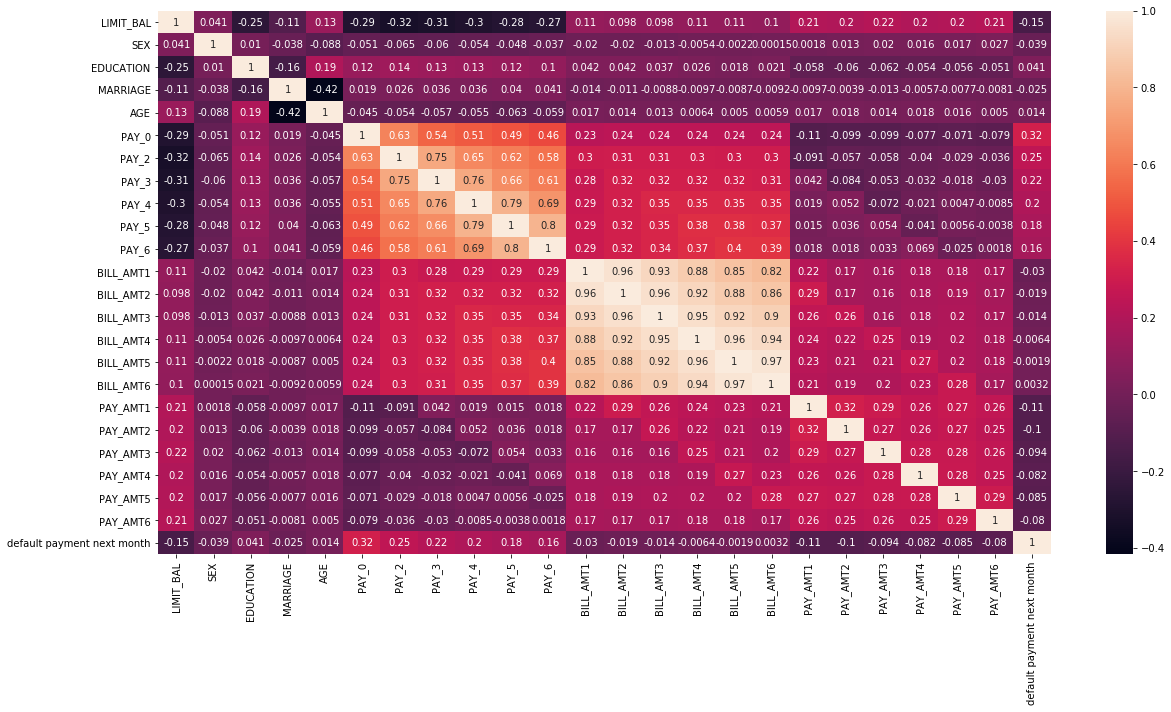

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [17]:
X = df.drop(['default payment next month'],1)
y = df['default payment next month']

In [18]:
import statsmodels.api as sm

res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.466155
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                26429
Model:                                  Logit   Df Residuals:                    26406
Method:                                   MLE   Df Model:                           22
Date:                        Mon, 12 Oct 2020   Pseudo R-squ.:                  0.1248
Time:                                13:27:52   Log-Likelihood:                -12320.
converged:                               True   LL-Null:                       -14077.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -5.038e-07    1.7e-07     -2.972      0.003   -8.36e-07   -1.72e-07
SEX           -0.1708      0.028     -5.997      0.000      -0.227      -0.115
EDUCATION     -0.1149      0.023     -4.962      0.000      -0.160      -0.070
MARRIAGE      -0.2416      0.024     -9.977      0.000      -0.289      -0.194
AGE            0.0016      0.001      1.083      0.279      -0.001       0.004
PAY_0          0.5749      0.019     30.688      0.000       0.538       0.612
PAY_2          0.1238      0.022      5.714      0.000       0.081       0.166
PAY_3          0.0596      0.025      2.423      0.015       0.011       0.108
PAY_4          0.0626      0.027      2.329      0.020       0.010       0.115
PAY_5          0.0217      0.029      0.749      0.454      -0.035       0.078
PAY_6          0.0003      0.024      0.014      0.989      -0.047       0.047
BILL_AMT1   -9.71e-06   1.65e-06     -5.872      0.000    -1.3e-05   -6.47e-06
BILL_AMT2   2.205e-06   2.29e-06      0.963      0.336   -2.28e-06    6.69e-06
BILL_AMT3   2.426e-06    2.1e-06      1.154      0.248   -1.69e-06    6.55e-06
BILL_AMT4   2.271e-06   2.08e-06      1.093      0.274    -1.8e-06    6.34e-06
BILL_AMT5  -4.452e-06    2.7e-06     -1.652      0.099   -9.74e-06    8.31e-07
BILL_AMT6   5.403e-06   2.23e-06      2.426      0.015    1.04e-06    9.77e-06
PAY_AMT1   -2.424e-05   4.71e-06     -5.148      0.000   -3.35e-05    -1.5e-05
PAY_AMT2   -2.932e-05   4.57e-06     -6.415      0.000   -3.83e-05   -2.04e-05
PAY_AMT3     -1.7e-05   4.41e-06     -3.853      0.000   -2.56e-05   -8.35e-06
PAY_AMT4     -9.1e-06   4.37e-06     -2.083      0.037   -1.77e-05   -5.39e-07
PAY_AMT5   -2.128e-05   4.84e-06     -4.393      0.000   -3.08e-05   -1.18e-05
PAY_AMT6    -9.29e-06   3.85e-06     -2.413      0.016   -1.68e-05   -1.74e-06
==============================================================================
"""

In [19]:
#Removing values having p value greater than 0.05
X.drop(['AGE',"PAY_5","PAY_6","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5"],1,inplace=True)
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.466389
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                26429
Model:                                  Logit   Df Residuals:                    26413
Method:                                   MLE   Df Model:                           15
Date:                        Mon, 12 Oct 2020   Pseudo R-squ.:                  0.1244
Time:                                13:27:56   Log-Likelihood:                -12326.
converged:                               True   LL-Null:                       -14077.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -4.838e-07   1.59e-07     -3.034      0.002   -7.96e-07   -1.71e-07
SEX           -0.1630      0.027     -5.970      0.000      -0.217      -0.110
EDUCATION     -0.1004      0.019     -5.222      0.000      -0.138      -0.063
MARRIAGE      -0.2390      0.024     -9.962      0.000      -0.286      -0.192
PAY_0          0.5779      0.019     30.911      0.000       0.541       0.615
PAY_2          0.1231      0.021      5.749      0.000       0.081       0.165
PAY_3          0.0640      0.024      2.620      0.009       0.016       0.112
PAY_4          0.0782      0.022      3.534      0.000       0.035       0.122
BILL_AMT1  -6.421e-06   6.67e-07     -9.624      0.000   -7.73e-06   -5.11e-06
BILL_AMT6   4.608e-06   8.32e-07      5.538      0.000    2.98e-06    6.24e-06
PAY_AMT1   -2.134e-05    4.4e-06     -4.853      0.000      -3e-05   -1.27e-05
PAY_AMT2   -2.726e-05   4.27e-06     -6.387      0.000   -3.56e-05   -1.89e-05
PAY_AMT3   -1.614e-05   4.04e-06     -3.998      0.000   -2.41e-05   -8.23e-06
PAY_AMT4   -1.292e-05   4.02e-06     -3.210      0.001   -2.08e-05   -5.03e-06
PAY_AMT5   -2.042e-05   4.48e-06     -4.560      0.000   -2.92e-05   -1.16e-05
PAY_AMT6   -9.578e-06   3.84e-06     -2.492      0.013   -1.71e-05   -2.05e-06
==============================================================================
"""

### SMOTE FOR IMBALANCED DATSET

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [21]:
#The numbers before SMOTE
num_before = dict(Counter(y))

#Performing SMOTE

#Define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#Transforming the dataset
X_smote, y_smote = pipeline.fit_resample(X,y)


#Tthe numbers after SMOTE
num_after = dict(Counter(y_smote))

In [22]:
print(num_before, num_after)

{1: 5935, 0: 20494} {0: 20493, 1: 16395}


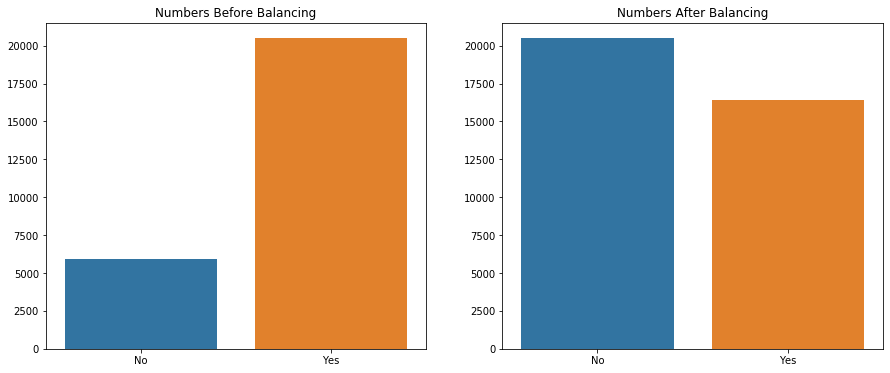

In [23]:
labels = ["No","Yes"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [24]:
print(X_smote)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0         170000    1          1         2      0      0      0      0   
1          20000    1          2         1      0      0      0      0   
2          70000    2          2         3      0      0      0      0   
3         210000    2          2         1      0      0      0      0   
4         170000    2          2         2      0      0      0      0   
...          ...  ...        ...       ...    ...    ...    ...    ...   
36883      40000    2          2         1      0      0      0      2   
36884      20000    2          2         2     -1      0      1      0   
36885      90000    2          2         1      0      0      0      0   
36886      50000    1          2         2      0      0     -1     -1   
36887      50000    2          2         1      0      0      0      0   

       BILL_AMT1  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0         129848          0   

### CREATING NEW DATAFRAME AFTER APPLYING SMOTE

In [25]:
X1 = pd.DataFrame(X_smote)
y1= pd.DataFrame(y_smote)

In [26]:
new_data = pd.concat([X1, y1], axis=1)
new_data.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4','BILL_AMT1','BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"default payment next month"]
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,170000,1,1,2,0,0,0,0,129848,0,5115,2500,0,0,0,0,0
1,20000,1,2,1,0,0,0,0,16621,18893,1200,10000,1301,662,700,1000,0
2,70000,2,2,3,0,0,0,0,70820,67818,2500,2507,2428,2594,2602,2500,0
3,210000,2,2,1,0,0,0,0,128553,64108,3762,3808,4177,2594,2442,2319,0
4,170000,2,2,2,0,0,0,0,71752,25140,2687,2671,3100,3286,1100,1000,0


### OUTLIER DETECTION TECHNIQUES

In [29]:
#FINDING THE NUMBER OF OUTLIERS
default = new_data[new_data['default payment next month']==1]
no_default = new_data[new_data['default payment next month']==0]
outlier_fraction = len(default)/float(len(no_default))


In [30]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(default)))
print("Valid Cases : {}".format(len(no_default)))


0.8000292782901478
Fraud Cases : 16395
Valid Cases : 20493


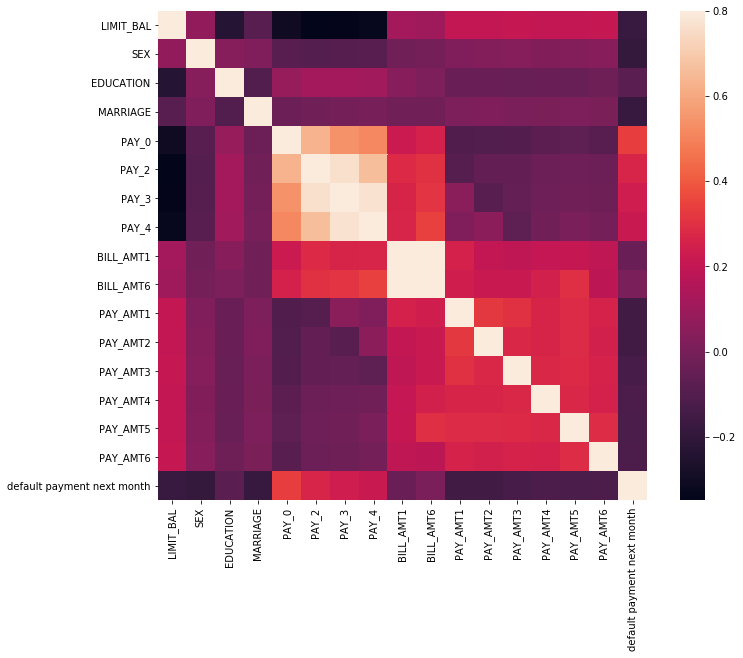

In [31]:
correlation_matrix = new_data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [37]:
columns = new_data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["default payment next month"]]
# Store the variable we are predicting 
target = "default payment next month"
# Define a random state 
state = np.random.RandomState(42)
X = new_data[columns]
Y = new_data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(36888, 16)
(36888,)


In [46]:
# APPLYING BOTH MODELS
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state= state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None)
   
}
   


In [47]:
#CREATING RESULTS
n_outliers = len(default)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 18314
Accuracy Score :
0.5035241813055736
Classification Report :
              precision    recall  f1-score   support

           0       0.65      0.23      0.34     20493
           1       0.47      0.84      0.60     16395

    accuracy                           0.50     36888
   macro avg       0.56      0.54      0.47     36888
weighted avg       0.57      0.50      0.46     36888

Local Outlier Factor: 19063
Accuracy Score :
0.48321947516807634
Classification Report :
              precision    recall  f1-score   support

           0       0.52      0.75      0.62     20493
           1       0.32      0.14      0.20     16395

    accuracy                           0.48     36888
   macro avg       0.42      0.45      0.41     36888
weighted avg       0.43      0.48      0.43     36888



In [48]:
X_new = new_data.drop(['default payment next month'],1)
y_new = new_data['default payment next month']
X_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,170000,1,1,2,0,0,0,0,129848,0,5115,2500,0,0,0,0
1,20000,1,2,1,0,0,0,0,16621,18893,1200,10000,1301,662,700,1000
2,70000,2,2,3,0,0,0,0,70820,67818,2500,2507,2428,2594,2602,2500
3,210000,2,2,1,0,0,0,0,128553,64108,3762,3808,4177,2594,2442,2319
4,170000,2,2,2,0,0,0,0,71752,25140,2687,2671,3100,3286,1100,1000


### TRAIN TEST SPLIT

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=0)

In [50]:
# STANDARDISATION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred = lr.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(cm)
print(acc)
print(pre)
print(recall)
print(f1)

[[3264  821]
 [1183 2110]]
0.7283816752507455
0.7198908222449676
0.640753112663225
0.6780205655526991


## RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [57]:
y_predRF= classifier.predict(x_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_predRF)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_predRF)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_predRF)
print("Accuracy:",result2)

Confusion Matrix:
[[3591  494]
 [ 830 2463]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4085
           1       0.83      0.75      0.79      3293

    accuracy                           0.82      7378
   macro avg       0.82      0.81      0.82      7378
weighted avg       0.82      0.82      0.82      7378

Accuracy: 0.8205475738682569


## KNN ALGORITHM

In [59]:
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
y_predKNN= knnclassifier.predict(x_test)

In [63]:
result = confusion_matrix(y_test, y_predKNN)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_predKNN)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_predKNN)
print("Accuracy:",result2)

Confusion Matrix:
[[3189  896]
 [ 922 2371]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4085
           1       0.73      0.72      0.72      3293

    accuracy                           0.75      7378
   macro avg       0.75      0.75      0.75      7378
weighted avg       0.75      0.75      0.75      7378

Accuracy: 0.753591759284359


## SVM MODEL

In [64]:
from sklearn import svm
#SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [65]:
predictions = clf.predict(x_test)
print("Size of training set: ", x_test.shape)
print(predictions.shape)

Size of training set:  (7378, 16)
(7378,)


In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[3434  651]
 [1147 2146]]


In [67]:
print(classification_report(y_test,predictions))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4085
           1       0.77      0.65      0.70      3293

    accuracy                           0.76      7378
   macro avg       0.76      0.75      0.75      7378
weighted avg       0.76      0.76      0.75      7378



0.7563025210084033